In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df_full = pd.read_feather('../data/full_normalized_data.fth')
df_full.head(3)

,index,user_id,Full Name,year of birth,Gender,Occupation,Active Since,Trabajador,Antiguedad,Horoscopo Activacion,movie_id,rating,Date_rating,Name_movie,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Antiguedad_pelicula
0,25416,259,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,255,4,1997-09-20 03:05:10,My Best Friend's Wedding (1997),1997-06-20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.657124
1,25457,259,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,286,4,1997-09-20 03:05:27,"English Patient, The (1996)",1996-11-15,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.615416
2,25445,259,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,298,4,1997-09-20 03:05:54,Face/Off (1997),1997-06-27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.658469


In [3]:
df_full.tail(3)

,index,user_id,Full Name,year of birth,Gender,Occupation,Active Since,Trabajador,Antiguedad,Horoscopo Activacion,movie_id,rating,Date_rating,Name_movie,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Antiguedad_pelicula
99987,79164,729,Daniel Palomares,1.208213,1,19,1998-04-22 23:02:29,-0.112969,1.950881,3,748,4,1998-04-22 23:10:38,"Saint, The (1997)",1997-03-14,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.638288
99988,79156,729,Daniel Palomares,1.208213,1,19,1998-04-22 23:02:29,-0.112969,1.950881,3,328,3,1998-04-22 23:10:38,Conspiracy Theory (1997),1997-08-08,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0.666542
99989,79158,729,Daniel Palomares,1.208213,1,19,1998-04-22 23:02:29,-0.112969,1.950881,3,333,4,1998-04-22 23:10:38,"Game, The (1997)",1997-01-01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.624449


In [4]:
df_full.rating = df_full.rating.astype(float)

# Arreglo los id de pelis y users

In [5]:
u_unique = df_full.user_id.unique()
user2Idx = {o:i+1 for i,o in enumerate(u_unique)}
idx2user = {v:k for k,v in user2Idx.items()}

m_unique = df_full.movie_id.unique()
movie2Idx = {o:i+1 for i,o in enumerate(m_unique)}
idx2Movie = {v:k for k,v in movie2Idx.items()}

In [6]:
df_full.user_id = df_full.user_id.apply(lambda x: user2Idx[x])
df_full.movie_id = df_full.movie_id.apply(lambda x: movie2Idx[x])

In [7]:
df_full.head(200)

,index,user_id,Full Name,year of birth,Gender,Occupation,Active Since,Trabajador,Antiguedad,Horoscopo Activacion,movie_id,rating,Date_rating,Name_movie,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Antiguedad_pelicula
0,25416,1,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,1,4.0,1997-09-20 03:05:10,My Best Friend's Wedding (1997),1997-06-20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.657124
1,25457,1,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,2,4.0,1997-09-20 03:05:27,"English Patient, The (1996)",1996-11-15,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.615416
2,25445,1,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,3,4.0,1997-09-20 03:05:54,Face/Off (1997),1997-06-27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.658469
3,25435,1,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,4,4.0,1997-09-20 03:06:21,Psycho (1960),1960-01-01,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-1.973172
4,25455,1,Allen Oliver,1.035245,1,19,1997-09-20 03:05:10,-0.112969,-1.453873,4,5,4.0,1997-09-20 03:07:23,"Princess Bride, The (1987)",1987-01-01,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.077668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,69899,5,Mike Larsen,1.121729,1,19,1997-09-20 17:41:00,-0.112969,-1.453873,4,182,5.0,1997-09-20 17:51:30,"Wrong Trousers, The (1993)",1993-01-01,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.343641
196,69905,5,Mike Larsen,1.121729,1,19,1997-09-20 17:41:00,-0.112969,-1.453873,4,183,5.0,1997-09-20 17:52:05,GoodFellas (1990),1990-01-01,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.132987
197,69849,5,Mike Larsen,1.121729,1,19,1997-09-20 17:41:00,-0.112969,-1.453873,4,184,5.0,1997-09-20 17:52:28,Schindler's List (1993),1993-01-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.343641
198,69823,5,Mike Larsen,1.121729,1,19,1997-09-20 17:41:00,-0.112969,-1.453873,4,185,5.0,1997-09-20 17:52:54,Back to the Future (1985),1985-01-01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.217976


# Seleccion de variables

In [8]:
df_full.columns

Index(['index', 'user_id', 'Full Name', 'year of birth', 'Gender',
       'Occupation', 'Active Since', 'Trabajador', 'Antiguedad',
       'Horoscopo Activacion', 'movie_id', 'rating', 'Date_rating',
       'Name_movie', 'Release Date', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Antiguedad_pelicula'],
      dtype='object')

In [9]:
columns = ['user_id', 'year of birth', 'Gender','Occupation', 'Trabajador', 
           'Antiguedad', 'Horoscopo Activacion', 'movie_id', 'rating','Action', 
           'Adventure', 'Animation','Children\'s', 'Comedy', 'Crime', 'Documentary', 
           'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
           'Sci-Fi','Thriller', 'War', 'Western', 'Antiguedad_pelicula']

df_full[columns]

,user_id,year of birth,Gender,Occupation,Trabajador,Antiguedad,Horoscopo Activacion,movie_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Antiguedad_pelicula
0,1,1.035245,1,19,-0.112969,-1.453873,4,1,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.657124
1,1,1.035245,1,19,-0.112969,-1.453873,4,2,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.615416
2,1,1.035245,1,19,-0.112969,-1.453873,4,3,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.658469
3,1,1.035245,1,19,-0.112969,-1.453873,4,4,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-1.973172
4,1,1.035245,1,19,-0.112969,-1.453873,4,5,4.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.077668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,943,1.208213,1,19,-0.112969,1.950881,3,120,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.624449
99986,943,1.208213,1,19,-0.112969,1.950881,3,1466,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.624449
99987,943,1.208213,1,19,-0.112969,1.950881,3,382,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.638288
99988,943,1.208213,1,19,-0.112969,1.950881,3,304,3.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0.666542


# Split Train y Validacion

In [10]:
# Ordenado cronologicamente voy a tener problemas, porque voy a querer validar con usuarios que nunca entrene
# df_full = df_full.sort_values(by='Date_rating')

# Entonces necesigo hacer un shuffle de las filas antes de splittear en train/val
df_full = df_full.sample(frac=1)
df_train, df_val = train_test_split(df_full, test_size=0.2,shuffle = False)


In [11]:
len(df_train),len(df_val)

(79992, 19998)

In [12]:
# Checkeo si se sigue manteniendo el orden cronologico
df_train.Date_rating.min(),df_train.Date_rating.max(),df_val.Date_rating.min(),df_val.Date_rating.max()

(Timestamp('1997-09-20 03:05:10'),
 Timestamp('1998-04-22 23:10:38'),
 Timestamp('1997-09-20 03:06:21'),
 Timestamp('1998-04-22 23:10:38'))

In [13]:
df_train.user_id.min(),df_train.user_id.max(),df_val.user_id.min(),df_val.user_id.max()

(1, 943, 1, 943)

In [14]:
df_train.movie_id.min(),df_train.movie_id.max(),df_val.movie_id.min(),df_val.movie_id.max()

(1, 1680, 1, 1680)

In [15]:
# Me fijo si quedaron users y pelis en los dos sets
n_users = int(df_train.user_id.nunique())
n_movies = int(df_train.movie_id.nunique())
n_users_train = int(df_train.user_id.nunique())
n_movies_train = int(df_train.movie_id.nunique())
print(n_users, n_movies, n_users_train, n_movies_train)

943 1653 943 1653


In [16]:
# Me fijo si quedaron users y pelis en los dos sets
n_users = int(df_val.user_id.nunique())
n_movies = int(df_val.movie_id.nunique())
n_users_train = int(df_val.user_id.nunique())
n_movies_train = int(df_val.movie_id.nunique())
print(n_users, n_movies, n_users_train, n_movies_train)

943 1405 943 1405


In [17]:
max_rating = df_train['rating'].max()
min_rating = df_train['rating'].min()
av_rating = df_train['rating'].mean()
max_rating, min_rating, av_rating

(5.0, 1.0, 3.532065706570657)

# Armado de la NN

In [18]:
# pasaron cosas..
# 
# %pip uninstall h5py -y
# %pip install h5py
# %pip install --upgrade keras tensorflow


In [19]:
from keras.layers import Input, Embedding, Flatten, Dropout, Concatenate, Dense, Activation, Lambda
from keras import Model
from keras.regularizers import l2
from keras.optimizers import Adam

In [20]:
# Hiperparámetros

n_latent_factors_user = 5
n_latent_factors_movie = 8

In [21]:
n_users = int(df_train.user_id.nunique())
n_movies = int(df_train.movie_id.nunique())
n_users,n_movies

(943, 1653)

In [22]:
n_users = int(df_full.user_id.nunique())
n_movies = int(df_full.movie_id.nunique())
n_users,n_movies

(943, 1680)

In [23]:
movie_input = Input(shape=[1],name='Item')
movie_embedding = Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding', embeddings_regularizer = l2(0.001))(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)
# movie_vec = Dropout(0.2)(movie_vec)


user_input = Input(shape=[1],name='User')
user_vec = Flatten(name='FlattenUsers')(Embedding(n_users + 1, 
                                                  n_latent_factors_user,name='User-Embedding')(user_input))
# user_vec = Dropout(0.2)(user_vec)


concat = Concatenate(name='Concat')([movie_vec, user_vec])
# concat = Dropout(0.2)(concat)

x = Dense(50,name='FullyConnected-1', activation='relu')(concat)
#x = Dropout(0.5)(x)
#x = Dense(50,name='FullyConnected-1', activation='relu')(concat)
#x = Dropout(0.5)(x)


## Se pueden sacar las siguientes dos lineas para no forzar a sigmoidea
x = Dense(1, activation='sigmoid',name='Activation')(x)
x = Lambda(lambda z: (max_rating - min_rating) * z + min_rating)(x)
##

model = Model([user_input, movie_input], x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Item (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Movie-Embedding     │ (None, 1, 8)      │     13,448 │ Item[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 5)      │      4,720 │ User[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenMovies       │ (None, 8)         │          0 │ Movie-Embedding[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FlattenUsers        │ (None, 5)         │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concat              │ (None, 13)        │          0 │ FlattenMovies[0]… │
│ (Concatenate)       │                   │            │ FlattenUsers[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FullyConnected-1    │ (None, 50)        │        700 │ Concat[0][0]      │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Activation (Dense)  │ (None, 1)         │         51 │ FullyConnected-1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ Activation[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,919 (73.90 KB)

 Trainable params: 18,919 (73.90 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import keras
import tensorflow as tf

In [25]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class PlotLosses(tf.keras.callbacks.Callback):
    def __init__(self, plot_interval=1, evaluate_interval=10, x_val=None, y_val_categorical=None):
        self.plot_interval = plot_interval
        self.evaluate_interval = evaluate_interval
        self.x_val = x_val
        self.y_val_categorical = y_val_categorical
        #self.model = model
    
    def on_train_begin(self, logs={}):
        print('Begin training')
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.logs = []
        self.weights = []
        self.acc_2 = []
        self.loss_2 = []
    
    def on_epoch_end(self, epoch, logs={}):
        if self.evaluate_interval is None:
            self.logs.append(logs)
            self.x.append(self.i)
            self.losses.append(logs.get('loss'))
            self.val_losses.append(logs.get('val_loss'))
            print(logs)
            self.acc.append(logs.get('root_mean_squared_error'))
            self.val_acc.append(logs.get('val_root_mean_squared_error'))
            self.weights.append(self.model.get_weights())
            self.i += 1
        
        if (epoch%self.plot_interval==0):
            clear_output(wait=True)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,5))
            ax1.plot(self.x, self.losses, label="loss")
            ax1.plot(self.x, self.val_losses, label="val_loss")
            ax1.legend()

            ax2.plot(self.x, self.acc, label="RMSE")
            ax2.plot(self.x, self.val_acc, label="val_RMSE")
            ax2.legend()
            plt.show();
        #score = self.model.evaluate(x_test, y_test_categorical, verbose=0)
        
        #print("accuracy: ", score[1])
    
    def on_batch_end(self, batch, logs={}):
        if self.evaluate_interval is not None:
            if (batch%self.evaluate_interval==0):
                self.i += 1
                self.logs.append(logs)
                self.x.append(self.i)
                self.losses.append(logs.get('loss'))
                self.acc.append(logs.get('root_mean_squared_error'))

                if self.x_val is not None:
                    score = self.model.evaluate(self.x_val, self.y_val_categorical, verbose=0)
                    self.val_losses.append(score[0])
                    self.val_acc.append(score[1])
            
        

In [26]:
plot_losses = PlotLosses(1, None)

In [27]:
# import keras.backend as K 
from tensorflow import keras
def root_mean_squared_error(y_true, y_pred):
    return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true))) 

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'mean_squared_error', metrics=[root_mean_squared_error])

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.hdf5.keras', verbose=1, save_best_only=True, monitor='val_root_mean_squared_error')

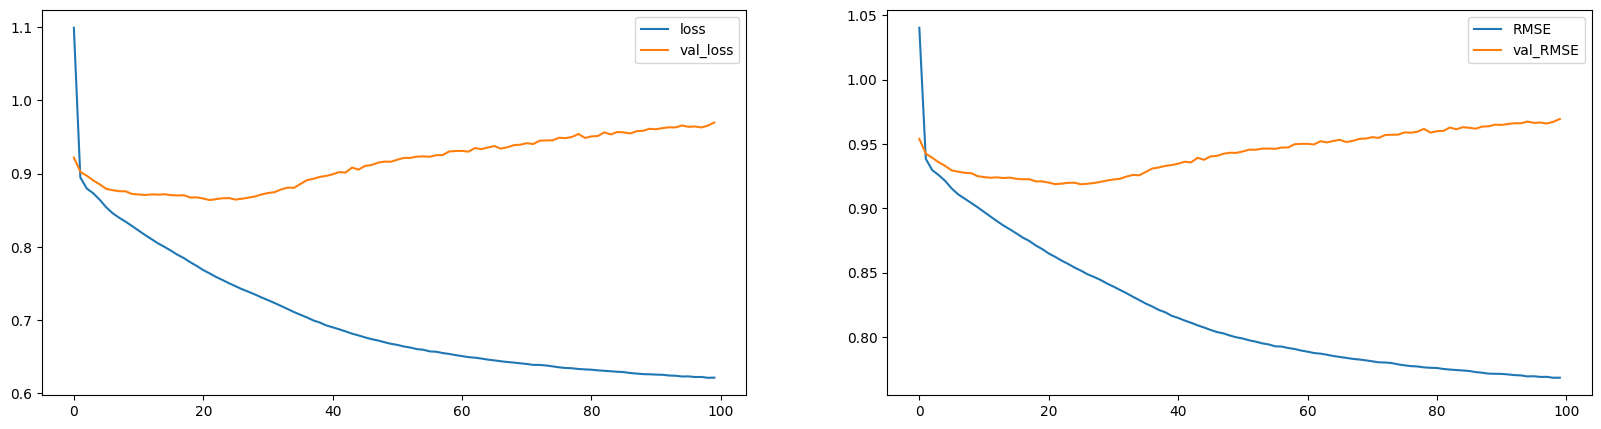


Epoch 100: val_root_mean_squared_error did not improve from 0.91868
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6071 - root_mean_squared_error: 0.7592 - val_loss: 0.9697 - val_root_mean_squared_error: 0.9694


In [28]:
history = model.fit([df_train.user_id, df_train.movie_id], 
                    df_train.rating, 
                    validation_data=([df_val.user_id, df_val.movie_id], df_val.rating), 
                    batch_size = 320,
                    callbacks = [plot_losses, checkpointer],
                    epochs=100, verbose=1)

In [29]:
model.evaluate([df_val.user_id, df_val.movie_id], df_val.rating)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.9587 - root_mean_squared_error: 0.9545


[0.969666600227356, 0.9602693319320679]

In [30]:
model.load_weights('weights.hdf5.keras')
model.evaluate([df_val.user_id, df_val.movie_id], df_val.rating)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.8539 - root_mean_squared_error: 0.9042


[0.8644538521766663, 0.9104633927345276]

# Embeddings

In [31]:
movie_embeddings_layer = model.layers[2]
user_embeddings_layer = model.layers[3]

movie_embeddings_layer.name, user_embeddings_layer.name

('Movie-Embedding', 'User-Embedding')

In [32]:
movie_embeddings_matrix = movie_embeddings_layer.get_weights()[0]
user_embeddings_matrix = user_embeddings_layer.get_weights()[0]
movie_embeddings_matrix.shape, user_embeddings_matrix.shape

((1681, 8), (944, 5))

In [33]:
model_test_emb = Model([movie_input], [movie_embedding])

In [34]:
# Model([movie_input], [movie_embedding]).predict(pd.Series([333]))

In [35]:
items = pd.read_csv('../data/peliculas.csv')
items.head()

,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [49]:
index = 424 #6
index2 = pd.Series([index])
movie_embed = model_test_emb.predict([index2])

items.loc[idx2Movie[index]].Name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Dolores Claiborne (1994)'

# KNN

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(movie_embeddings_matrix)

In [52]:
neighbors = nbrs.kneighbors([movie_embeddings_matrix[index]])

In [53]:
neighbors

(array([[0.        , 0.01778096, 0.02551764, 0.0281477 , 0.03364784,
         0.03462607, 0.03612274, 0.04091573, 0.04388911, 0.05243313]],
       dtype=float32),
 array([[ 424,   77,  794,  607,  736, 1165, 1174,  544, 1182,  512]],
       dtype=int64))

In [54]:
for idx in neighbors[1][0]:
    print(items.loc[idx2Movie[idx]].movieTitle)

NameError: name 'items' is not defined

In [ ]:
from fnn_helper import PlotLosses
plot_losses = PlotLosses(1, None)
import keras.backend as K 
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model.compile(Adam(learning_rate=learning_rate), 'mean_squared_error', metrics=[root_mean_squared_error])
len(ratings_train)
[ratings_train.userId, ratings_train.movieId]
history = model.fit(
    [ratings_train.userId, ratings_train.movieId], 
    ratings_train.rating, 
    batch_size=400,
    validation_data=([ratings_val.userId, ratings_val.movieId], ratings_val.rating), 
    epochs=epochs, 
    callbacks = [plot_losses],
    verbose=1)

model.metrics_names
loss_val, rmse_val = model.evaluate([ratings_val.userId, ratings_val.movieId], ratings_val.rating)
loss_val, rmse_val
loss_train, rmse_train = model.evaluate([ratings_train.userId, ratings_train.movieId], ratings_train.rating)
loss_train, rmse_train
import mlflow
mlflow.set_experiment('sistemas-de-recomendación')
mlflow.log_params({
    'n_latent_factors': n_latent_factors,
    'learning_rate': learning_rate,
    'epochs': epochs
})
mlflow.log_metrics({
    'loss_val': loss_val, 'rmse_val':rmse_val,
    'loss_train': loss_train, 'rmse_train':rmse_train,
})
mlflow.end_run()
# Embeddings
model.summary()
model.layers
movie_embeddings_layer = model.layers[2]
user_embeddings_layer = model.layers[3]
movie_embeddings_layer.name, user_embeddings_layer.name
movie_embeddings_layer.get_weights()[0].shape
user_embeddings_layer.get_weights()[0][54]
movie_embeddings_matrix = movie_embeddings_layer.get_weights()[0]
user_embeddings_matrix = user_embeddings_layer.get_weights()[0]
movie_embeddings_matrix.shape, user_embeddings_matrix.shape, n_movies, n_users
import numpy as np

np.save('vectors/movie_embeddings_matrix.npy', movie_embeddings_matrix)
np.save('vectors/user_embeddings_matrix.npy', user_embeddings_matrix)
np.save('vectors/user2Idx.npy', user2Idx)
np.save('vectors/movie2Idx.npy', movie2Idx)

from sklearn.metrics.pairwise import pairwise_distances

movie_embeddings_matrix[18], movie_embeddings_matrix[17]
model_test_emb = Model(inputs=[user_input, movie_input], outputs=[movie_embedding, prod])
import numpy as np
movie_vects, prod = model_test_emb.predict([np.array([15, 19, 19]), np.array([19, 19, 17])])
movie_vects
pairwise_distances(movie_vects[0], movie_vects[2], metric='cosine')
from sklearn.neighbors import NearestNeighbors
movie_embeddings_matrix.shape
nn = NearestNeighbors(n_neighbors=5, metric='cosine').fit(movie_embeddings_matrix)
movie_vects, _ = model_test_emb.predict([np.array([15]), np.array([19])])
movie_vects.shape
nn.kneighbors(movie_vects[0])
